In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import font_manager
for file in font_manager.findSystemFonts([r'C:\Users\crino\Downloads\Lato']):
    font_manager.fontManager.addfont(path=file)
plt.rcParams['font.family'] = 'Lato'

In [3]:
class datoni:
    
    def __init__(self, name):
        
        self.file_name = f"{name}"
        #self.file_path =f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\datafile{file_name}.csv"
        self.file_path = f"C:\\Users\\crino\\Desktop\\Thesis_ISI\\Simulations\\data_simulation\\datafile{name}.csv"
        self.datuni = pd.read_csv(self.file_path)
        self.lambdas = self.datuni.iloc[0]
        self.sim_data = self.datuni.iloc[1:]
        self.thresh = self.datuni.iloc[0,6]
        
        
    def media(self):
        #qua devo fare la media
        media = self.sim_data.mean() / 100000
        return media
        
    def varia(self):
        N = 100000
        r_mean = self.media()
        df_sq = (self.sim_data / N) ** 2
        r_mean2 = df_sq.mean()
        r_var_t = np.sqrt(np.abs(r_mean2 - (r_mean ** 2))) / r_mean
        r_var = r_var_t / np.max(r_var_t)
        return r_var

class plottoni:
    
    def __init__(self, pname, color, marker):
        self.pname = f"{pname}"
        self.color = f"{color}"
        self.marker = f"{marker}"
        self.pfile_name = f"{pname}"
        self.pfile_path =f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\param_{self.pfile_name}.csv"
        self.params = pd.read_csv(self.pfile_path)
        self.p_u = self.params["p_u"][0]
        #print(self.p)
        self.w_u = self.params["w_u"][0]
        #print(self.w)
        self.datoni = datoni(name = self.pname)
        self.erre = [float(column) for column in self.datoni.datuni.columns]
    
    def plotto(self, *axs):

        
        axs[0].plot(self.datoni.lambdas, self.datoni.media(), color=self.color, marker=self.marker , alpha=0.7, label=f"$p = {self.p_u}\, w = {self.w_u}$")
        axs[0].vlines(self.datoni.thresh, ymin = 0, ymax = 0.7,  colors = self.color, linestyle = "-.")
        lower_bound, upper_bound = np.percentile(self.datoni.sim_data/100000, [2.5, 97.5], axis = 0)
        axs[0].fill_between(x=self.datoni.lambdas, y1=lower_bound, y2=upper_bound, color=self.color, alpha =0.2, linewidth = 0)
        axs[0].scatter(self.datoni.lambdas, self.datoni.media(), color=self.color, marker=self.marker, edgecolors='black', linewidth=0.4)
        
        
        axs[0].set_xlabel("$\lambda$")
        axs[0].set_ylabel("$r_{\infty}$")

        
        axs[1].plot(self.datoni.lambdas, self.datoni.varia(), color=self.color, marker=self.marker , alpha=0.7, label=f"$p = {self.p_u}\, w = {self.w_u}$")
        axs[1].vlines(self.datoni.thresh, ymin = 0, ymax = 1,  colors = self.color, linestyle = "-.")
        axs[1].scatter(self.datoni.lambdas, self.datoni.varia(), color=self.color, marker=self.marker, edgecolors='black', linewidth=0.4)

        axs[1].set_xlabel("$\lambda$")
        axs[1].set_ylabel("$σ_{r_∞}/σ_{max}$")
        
        for ax in axs:
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.grid(axis="both", linestyle="--", linewidth=0.3)
        
        

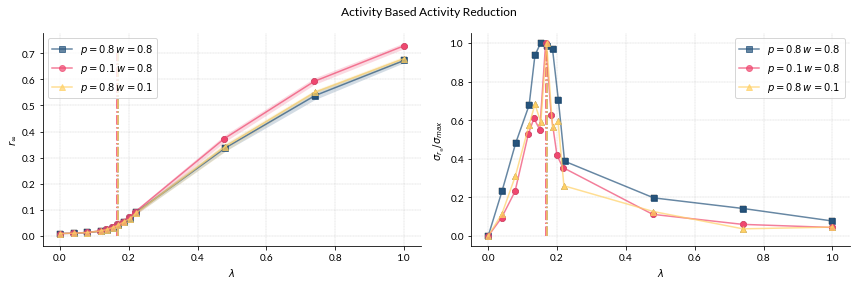

In [4]:
plotton1 = plottoni(pname = "_ab_act_red_At", color = "#ef476f", marker = "o")
plotton2 = plottoni(pname = "_ab_act_red_Bt", color = "#26547c", marker = "s")
plotton3 = plottoni(pname = "_ab_act_red_Ct", color = "#ffd166", marker = "^")
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
#print(axs)
#print(plotton1.datoni.media())
#print(plotton2.datoni.media())
plotton2.plotto(*axs.flatten())
plotton1.plotto(*axs.flatten())
plotton3.plotto(*axs.flatten())

for ax in axs.flatten():
    ax.grid(True)
    ax.legend()
fig.suptitle("Activity Based Activity Reduction")
plt.tight_layout()

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_act_red_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

plt.show()

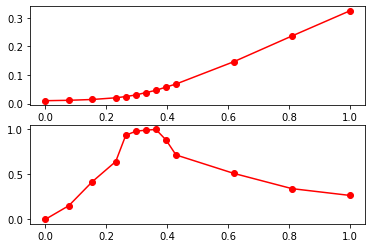

In [56]:
fig, axs = plt.subplots(2)
axs[0].plot(primo.lambdas, primo.media(), color = "r", marker = "o")
axs[1].plot(primo.lambdas, primo.varia(), color = "r", marker = "o")

In [28]:
df = pd.read_csv(file_path)

In [31]:
class Species:
    # Class variable (shared among all instances)
    kingdom = "Animalia"

    def __init__(self, name, common_name, classification, habitat):
        # Instance variables defined within the __init__ method
        self.name = name
        self.common_name = common_name
        self.classification = classification
        self.habitat = habitat

    def display_info(self):
        return f"Species: {self.name}\nCommon Name: {self.common_name}\nClassification: {self.classification}\nHabitat: {self.habitat}"

# Example usage:
if __name__ == "__main__":
    # Create instances of the Species class
    lion = Species(name="Panthera leo", common_name="Lion", classification="Mammal", habitat="Grasslands")

    # Accessing class variable
    print("Kingdom:", lion.kingdom)

    # Accessing instance variables
    print("Name:", lion.name)
    print("Common Name:", lion.common_name)

    # Display information about the species
    print("\nInformation about Lion:")
    print(lion.display_info())

Kingdom: Animalia
Name: Panthera leo
Common Name: Panthera leo

Information about Lion:
Species: Panthera leo
Common Name: Panthera leo
Classification: Mammal
Habitat: Grasslands


In [ ]:
#next step, devo fare il plot con questi dati. 
#Devo decidere se creare una classe oppure fare tutto a mano. Ricorda che questo è il notebook per act reduction

class 